# Analysis of Google Playstore apps

The dataset is chosen from Kaggle. It consists of 7133 Play Store apps for analyzing the Android market. It consists of in total of 10841 rows and 13 columns.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
import pandas as pd

In [3]:
google_df = pd.read_csv('googleplaystore.csv')

The dataset has been downloaded and extracted.

In [4]:
len(google_df.App.unique())

9660

In [5]:
google_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [6]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
google_df[google_df['Reviews'].str.contains('M')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
google_df.drop(google_df.index[10472],inplace=True)

In [9]:
google_df['Reviews']=google_df['Reviews'].astype(int)

In [10]:
google_df.Reviews.dtypes

dtype('int64')

In [11]:
google_df.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10840, dtype: object

In [12]:
google_df['Installs']=google_df['Installs'].str.replace('+', '')
google_df['Installs']=google_df['Installs'].str.replace(',', '')

In [13]:
google_df['Installs']=google_df['Installs'].astype(int)

In [14]:
google_df.drop(google_df[google_df.Reviews < int(25)].index, inplace = True)

In [15]:
google_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3.8,1195,582k,100000,Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,1000,Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [16]:
google_df.dropna(subset = ["Rating"], inplace=True)

In [17]:
google_beauty = google_df[google_df['Category'] == 'BEAUTY']
google_dating = google_df[google_df['Category'] == 'DATING']
google_food = google_df[google_df['Category'] == 'FOOD_AND_DRINK']
google_social = google_df[google_df['Category'] == 'SOCIAL']
google_shop = google_df[google_df['Category'] == 'SHOPPING']
google_travel = google_df[google_df['Category'] == 'TRAVEL_AND_LOCAL']
google_finance = google_df[google_df['Category'] == 'FINANCE']
google_prod = google_df[google_df['Category'] == 'PRODUCTIVITY']
google_news = google_df[google_df['Category'] == 'NEWS_AND_MAGAZINES']
google_maps = google_df[google_df['Category'] == 'MAPS_AND_NAVIGATION']

In [18]:
most_popular_beauty= google_beauty.sort_values(by = ['Installs'], ascending = False). head(14)
most_popular_dating= google_dating.sort_values(by = ['Installs'], ascending = False). head(20)
most_popular_food= google_food.sort_values(by = ['Installs'], ascending = False). head(20)
most_popular_social= google_social.sort_values(by = ['Installs'], ascending = False). head(30)
most_popular_shop= google_shop.sort_values(by = ['Installs'], ascending = False). head(30)
most_popular_travel= google_travel.sort_values(by = ['Installs'], ascending = False). head(25)
most_popular_finance= google_finance.sort_values(by = ['Installs'], ascending = False). head(20)
most_popular_prod= google_prod.sort_values(by = ['Installs'], ascending = False). head(20)
most_popular_news= google_news.sort_values(by = ['Installs'], ascending = False). head(20)
most_popular_maps= google_maps.sort_values(by = ['Installs'], ascending = False). head(14)

## Asking and Answering Questions:
### Q1.  Which are the most popular apps in the category:
#### -Beauty
#### -Dating
#### -Food
#### -Social
#### -Shopping
#### -Travel
#### -Finance
#### -Productivity
#### -News
#### -Maps and Navigation



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [22]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (19, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-pack

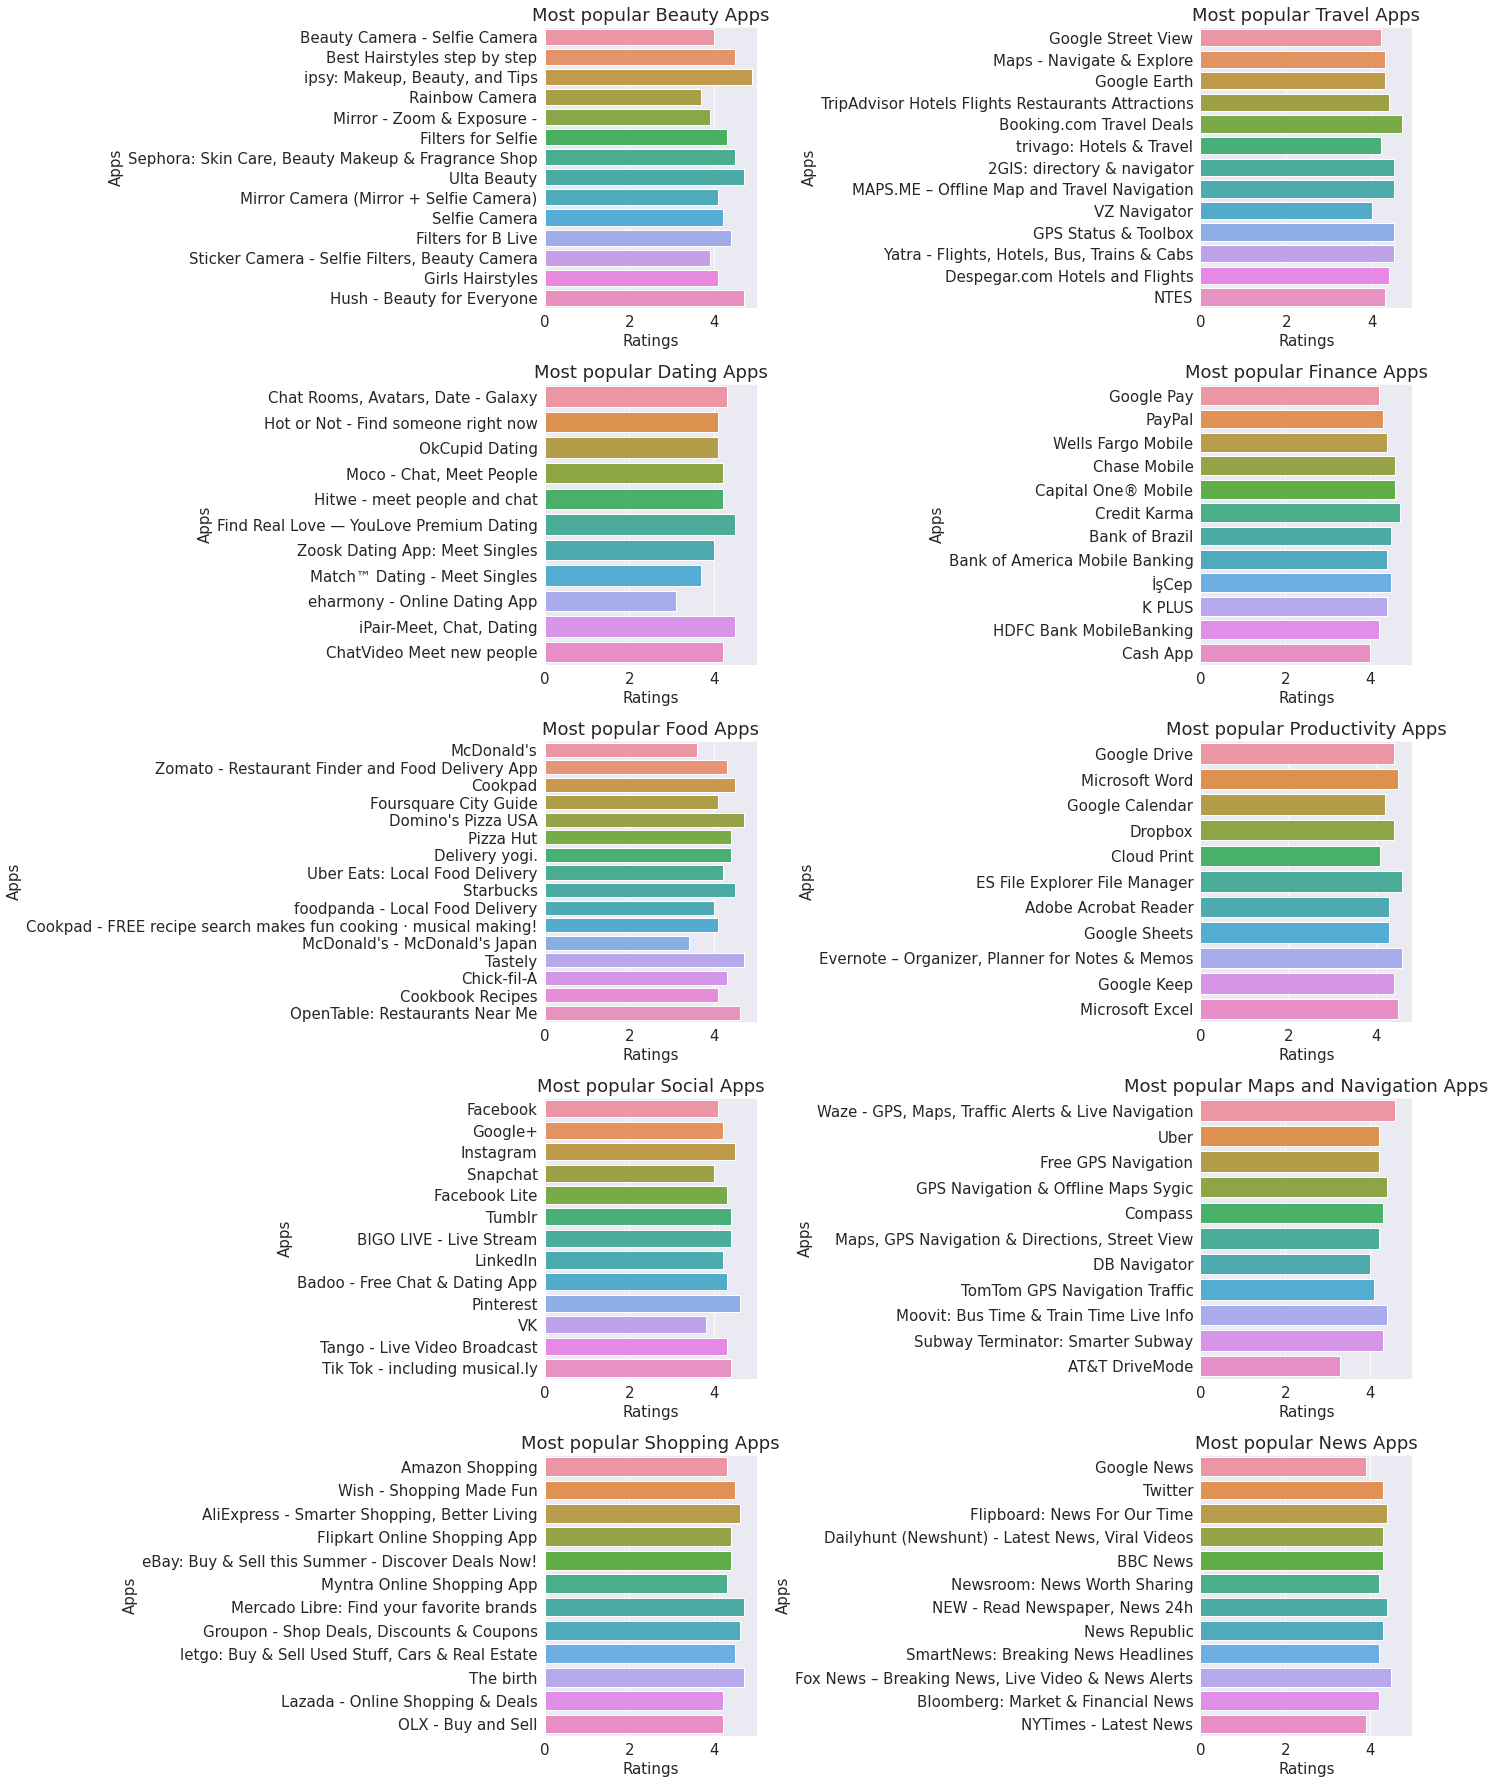

In [23]:
fig, axes = plt.subplots(5,2, figsize=(20, 25))
#axes.set_xlim(0,5)
# Use the axes for plotting
sns.barplot(most_popular_beauty.Rating, most_popular_beauty.App,  ax = axes[0,0])
axes[0,0].set_xlabel('Ratings')
axes[0,0].set_xlim(0,5)
axes[0,0].set_ylabel('Apps')
axes[0,0].set_title('Most popular Beauty Apps')

sns.barplot(most_popular_dating.Rating, most_popular_dating.App, ax = axes[1,0])
axes[1,0].set_xlabel('Ratings')
axes[1,0].set_xlim(0,5)
axes[1,0].set_ylabel('Apps')
axes[1,0].set_title('Most popular Dating Apps')

sns.barplot(most_popular_food.Rating, most_popular_food.App, ax = axes[2,0])
axes[2,0].set_xlabel('Ratings')
axes[2,0].set_xlim(0,5)
axes[2,0].set_ylabel('Apps')
axes[2,0].set_title('Most popular Food Apps')

sns.barplot(most_popular_social.Rating, most_popular_social.App, ax = axes[3,0])
axes[3,0].set_xlabel('Ratings')
axes[3,0].set_xlim(0,5)
axes[3,0].set_ylabel('Apps')
axes[3,0].set_title('Most popular Social Apps')

sns.barplot(most_popular_shop.Rating, most_popular_shop.App, ax = axes[4,0])
axes[4,0].set_xlabel('Ratings')
axes[4,0].set_xlim(0,5)
axes[4,0].set_ylabel('Apps')
axes[4,0].set_title('Most popular Shopping Apps')

sns.barplot(most_popular_travel.Rating, most_popular_travel.App, ax = axes[0,1])
axes[0,1].set_xlabel('Ratings')
axes[0,1].set_ylabel('Apps')
axes[0,1].set_title('Most popular Travel Apps')

sns.barplot(most_popular_finance.Rating, most_popular_finance.App, ax = axes[1,1])
axes[1,1].set_xlabel('Ratings')
axes[1,1].set_xlim(0,5)
axes[1,1].set_ylabel('Apps')
axes[1,1].set_title('Most popular Finance Apps')

sns.barplot(most_popular_prod.Rating, most_popular_prod.App, ax = axes[2,1])
axes[2,1].set_xlabel('Ratings')
axes[2,1].set_ylabel('Apps')
axes[2,1].set_title('Most popular Productivity Apps')

sns.barplot(most_popular_maps.Rating, most_popular_maps.App, ax = axes[3,1])
axes[3,1].set_xlabel('Ratings')
axes[3,1].set_xlim(0,5)
axes[3,1].set_ylabel('Apps')
axes[3,1].set_title('Most popular Maps and Navigation Apps')

sns.barplot(most_popular_news.Rating, most_popular_news.App, ax = axes[4,1])
axes[4,1].set_xlabel('Ratings')
axes[4,1].set_xlim(0,5)
axes[4,1].set_ylabel('Apps')
axes[4,1].set_title('Most popular News Apps')


plt.tight_layout(pad=1);


In [24]:
google_df.reindex(axis='index', level=0)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3.8,1195,582k,100000,Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,1000,Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### Q2.  Highly reviewed apps across all categories

In [25]:
google_df.drop_duplicates(subset=['App'], inplace=True)


In [26]:
highly_reviewed_apps= google_df.sort_values(by = ['Reviews'], ascending = False). head(30)

In [27]:
highly_reviewed_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1670,Clash of Clans,GAME,4.6,44891723,98M,100000000,Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,Varies with device,500000000,Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,Varies with device,500000000,Free,0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
1660,Clash Royale,GAME,4.6,23133508,97M,100000000,Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up


In [28]:
highly_reviewed_apps.shape

(30, 13)

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Top 30 Highest Reviewed Apps'}, xlabel='App', ylabel='Reviews'>

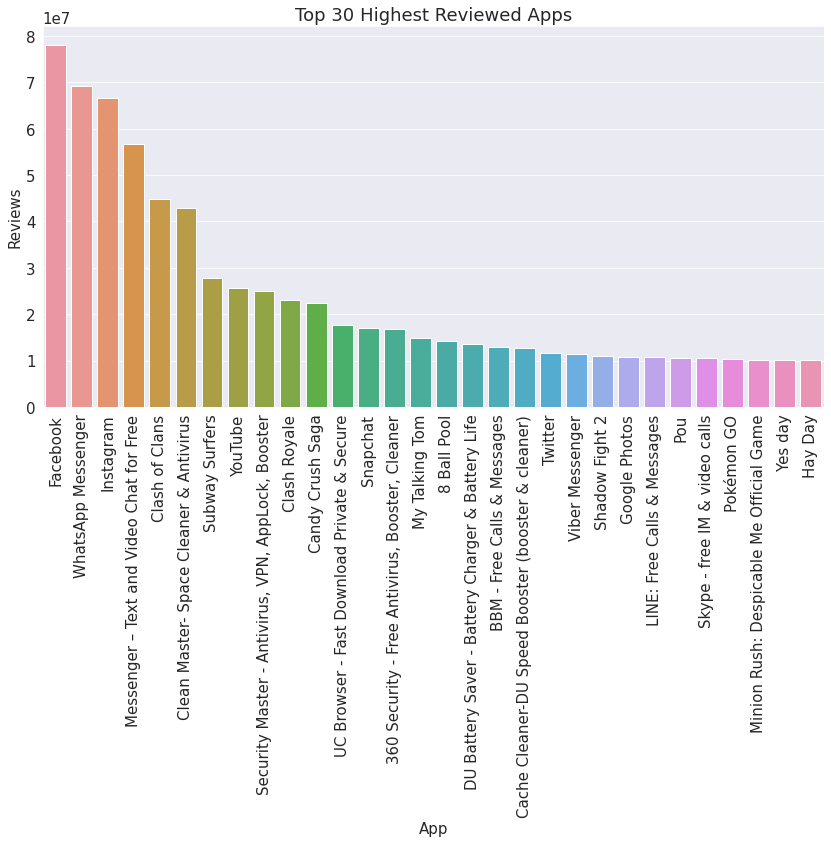

In [29]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Apps")
plt.ylabel("Reviews")
plt.title("Top 30 Highest Reviewed Apps")
sns.barplot(highly_reviewed_apps.App, highly_reviewed_apps.Reviews)

### Q3. Highly installed apps across all categories

In [30]:
highly_installed_apps= google_df.sort_values(by = ['Installs'], ascending = False)

In [31]:
highly_installed_apps.Genres.unique()

array(['Video Players & Editors', 'Communication', 'Books & Reference',
       'Social', 'News & Magazines', 'Travel & Local', 'Tools',
       'Productivity', 'Photography', 'Arcade', 'Entertainment', 'Casual',
       'Health & Fitness', 'Action', 'Lifestyle', 'Sports',
       'Personalization', 'Business', 'Strategy', 'Maps & Navigation',
       'Finance', 'Adventure;Action & Adventure', 'Education;Education',
       'Racing', 'Puzzle', 'Adventure', 'Trivia', 'Puzzle;Brain Games',
       'Shopping', 'Casual;Action & Adventure', 'Weather', 'Music',
       'Board', 'Card', 'Educational;Pretend Play',
       'Educational;Action & Adventure', 'Racing;Action & Adventure',
       'Puzzle;Action & Adventure', 'Casino', 'Casual;Pretend Play',
       'Simulation', 'Role Playing', 'Entertainment;Music & Video',
       'Word', 'Art & Design', 'Parenting', 'Educational;Education',
       'Casual;Music & Video', 'Education', 'Adventure;Education',
       'Arcade;Action & Adventure', 'Action;Action

In [32]:
highly_installed_apps.shape

(7139, 13)

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


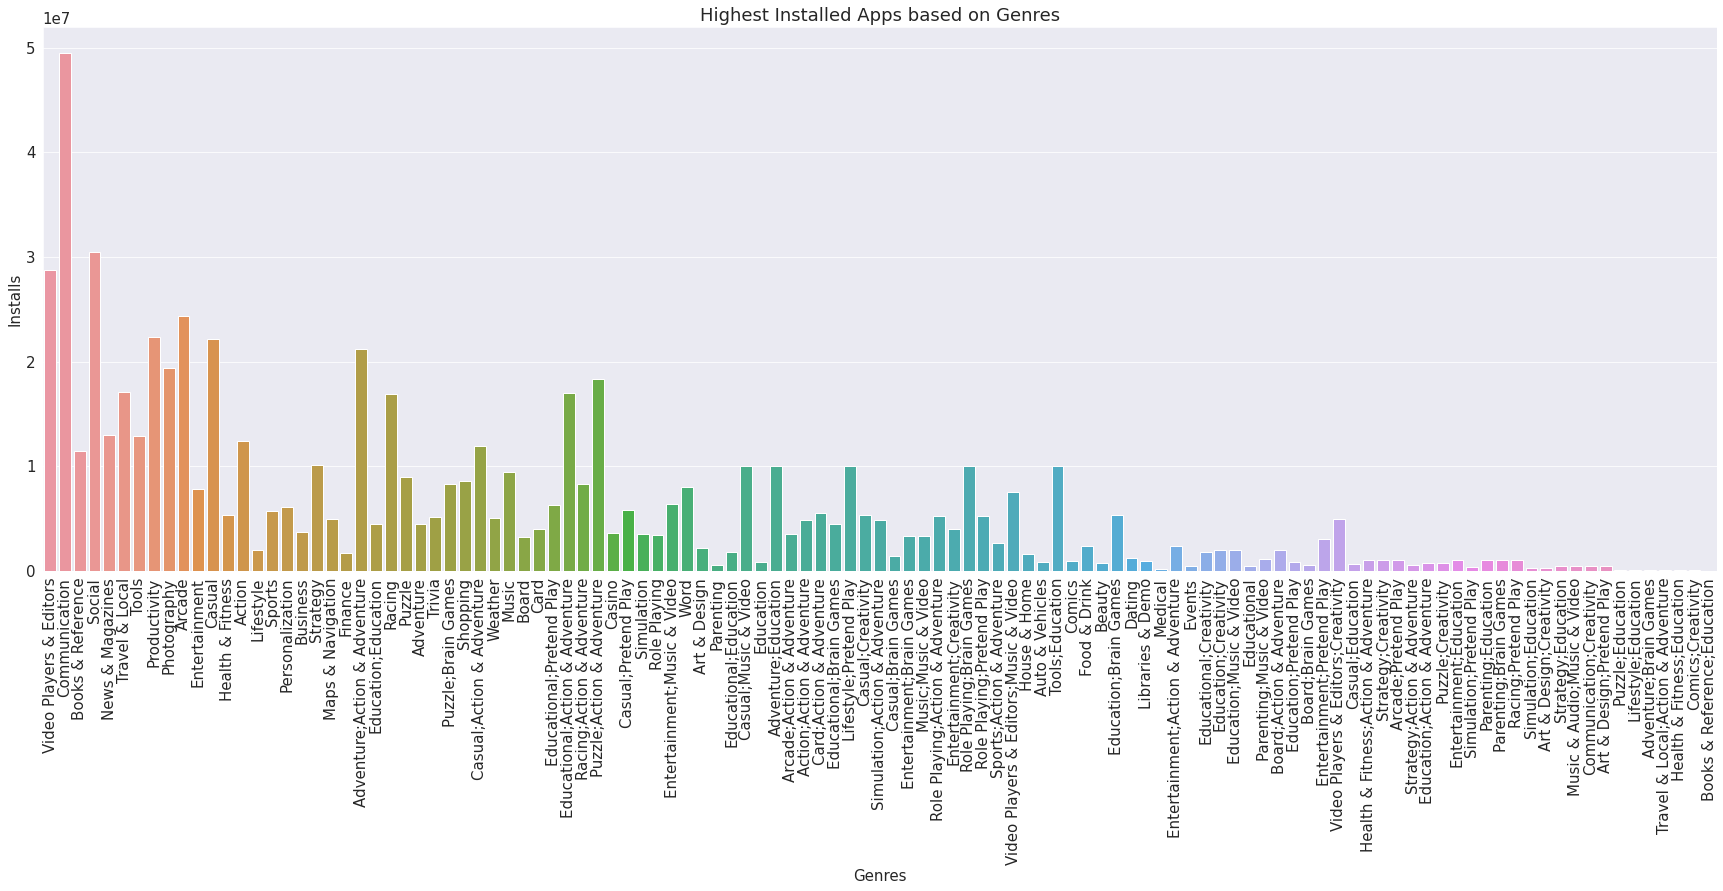

In [33]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.title("Highest Installed Apps based on Genres")
sns.barplot(highly_installed_apps.Genres, highly_installed_apps.Installs, ci=None);

### Q4. Highest Installed Apps based on Category

In [34]:
google_df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


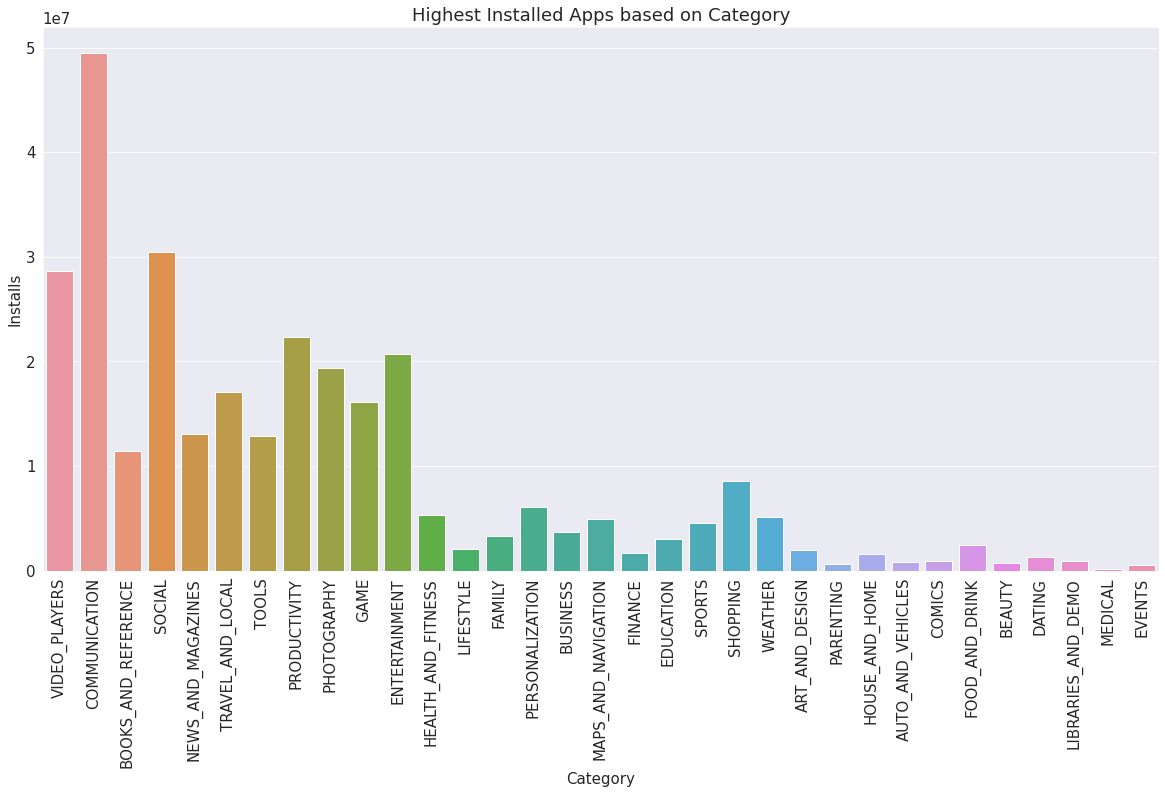

In [35]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Highest Installed Apps based on Category")
sns.barplot(highly_installed_apps.Category, highly_installed_apps.Installs, ci=None);

### Q5. Number of Apps based on Content Rating

In [36]:
google_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [37]:
google_df.dropna(subset = ['Content Rating'], inplace = True)

In [38]:
google_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [39]:
google_df.columns = ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'ContentRating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver']

In [40]:
google_df = google_df.dropna()

In [41]:
category_installs_cat = google_df.groupby('ContentRating')[['App']].count()

In [42]:
category_installs_cat

,App
ContentRating,
Adults only 18+,3
Everyone,5677
Everyone 10+,293
Mature 17+,319
Teen,840
Unrated,1


In [43]:
category_installs_cat.index

Index(['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+', 'Teen',
       'Unrated'],
      dtype='object', name='ContentRating')

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


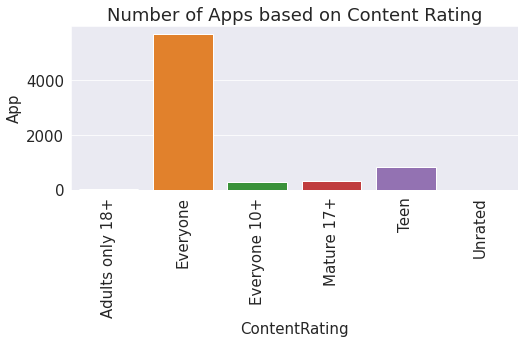

In [44]:
plt.figure(figsize=(8,3))
plt.xticks(rotation=90)
plt.title("Number of Apps based on Content Rating")
sns.barplot(category_installs_cat.index, category_installs_cat.App);

### Q6. Number of Apps based on whether Paid or Free

In [45]:
highly_installed_apps.Type

3687     Free
341      Free
152      Free
2554     Free
3736     Free
         ... 
9175     Free
5940     Free
9073     Free
4450     Paid
10564    Free
Name: Type, Length: 7139, dtype: object

In [46]:
import numpy as np
highly_installed_apps['log_Installs'] = np.log2(highly_installed_apps['Installs'])

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


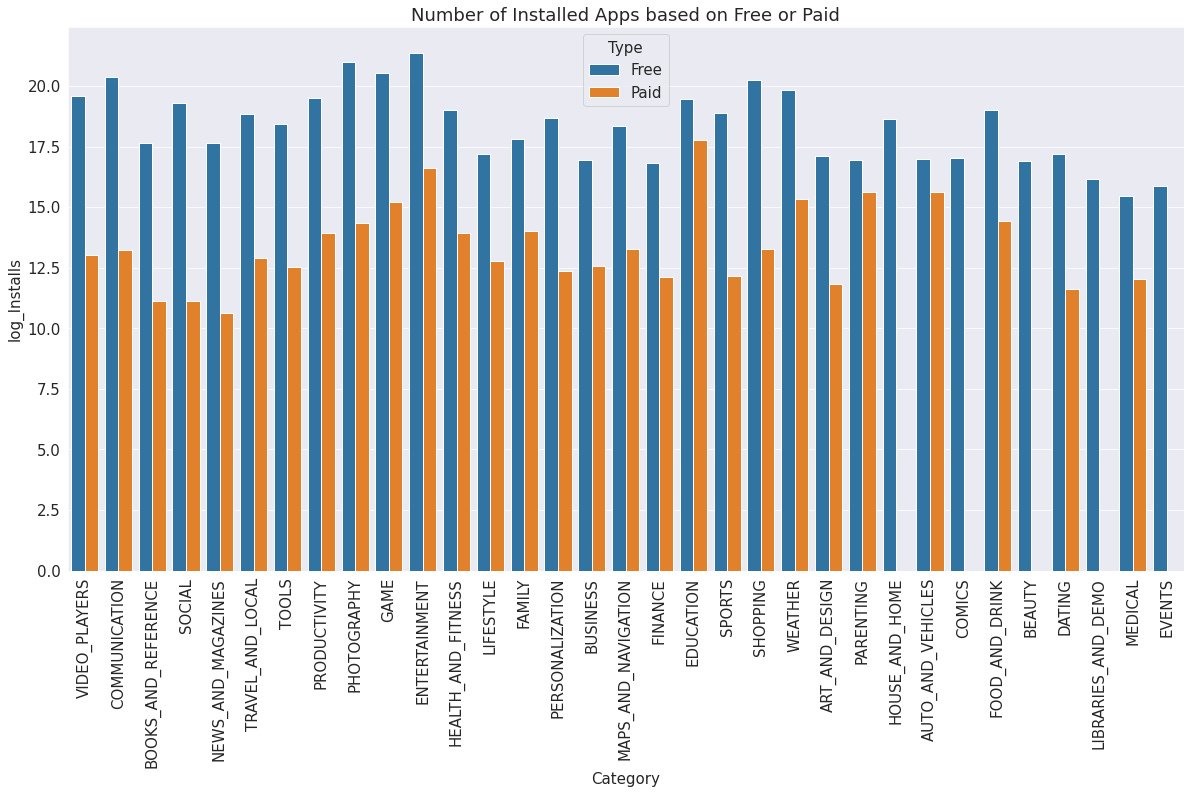

In [47]:
plt.figure(figsize=(20,10))
plt.title("Number of Installed Apps based on Free or Paid")
plt.xticks(rotation=90)
sns.barplot(highly_installed_apps.Category, highly_installed_apps.log_Installs, hue = highly_installed_apps.Type, ci = None);
#plt.bar(highly_installed_apps.Category, highly_installed_apps[highly_installed_apps.Type == 'Paid'].Installs, bottom=free_df.Installs);


#sns.scatterplot(highly_installed_apps.Category, highly_installed_apps.Installs, hue = highly_installed_apps.Type, s=100);

In [48]:
import jovian

In [49]:
jovian.commit(project='google-playstore-kiran')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kiranpatel4192/google-playstore-kiran" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/kiranpatel4192/google-playstore-kiran


'https://jovian.ai/kiranpatel4192/google-playstore-kiran'